In this project, “ Predictions of Adult Income Census”, 
This is based on the 1994 United States Census Bureau data. 
They aimed to predict whether individuals would earn more 
or less than $50,000 per year using variables such as age, 
capital gains or losses, native country, and education level. 
This project plays a crucial role in providing insights into income and health prediction based on census data.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df = pd.read_csv("Income Prediction Adult Data.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [32]:
df.shape

(32561, 15)

In [34]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [36]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

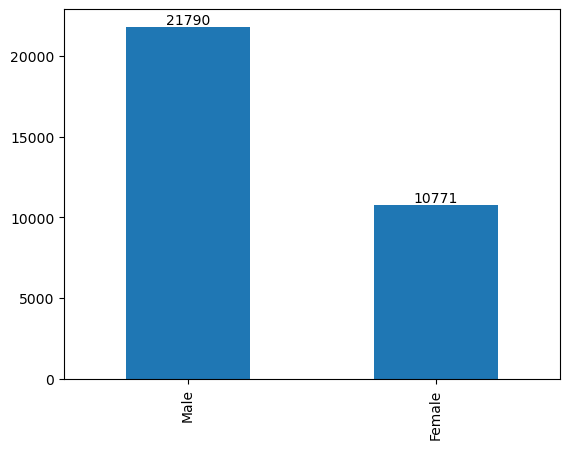

In [48]:
counts = df['sex'].value_counts()
charts = counts.plot(kind='bar')

for index, i in enumerate(counts):
    charts.text(index,i,str(i),horizontalalignment='center',verticalalignment='bottom')



In [38]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [39]:
df['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [40]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [44]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

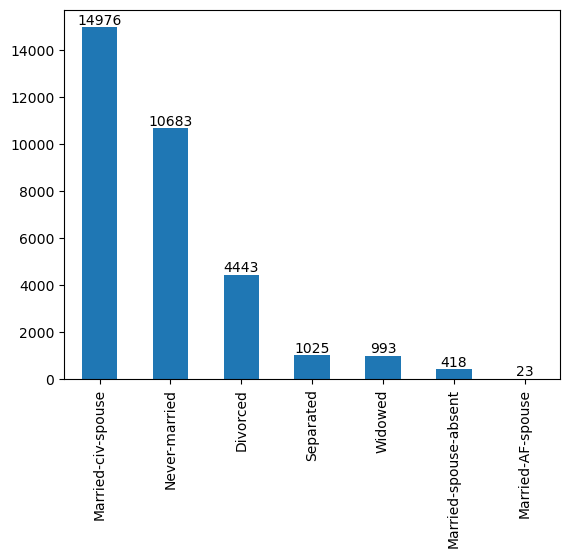

In [46]:
count = df['marital.status'].value_counts()
chart = count.plot(kind='bar')

for index, i in enumerate(count):
    chart.text(index,i,str(i),horizontalalignment='center',verticalalignment='bottom')
    

In [3]:
nullvalues = df.isnull().sum()
nullvalues

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
data_types = df.dtypes
data_types

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
# List of numerical features
numeric_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

# List of categorical features
cat_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [6]:
def replace_missing_values(column, value):
    df[column] = df[column].replace('?', value)

# Replace missing values in specified columns with provided values
replace_missing_values('workclass', 'Unknown')
replace_missing_values('occupation', 'Unknown')
replace_missing_values('native.country', 'United-States')


In [7]:
# Create mapping dictionary
income_map = {'<=50K': 0, '>50K': 1}

# Apply mapping to 'income' column
df['income'] = df['income'].replace(income_map)


In [8]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

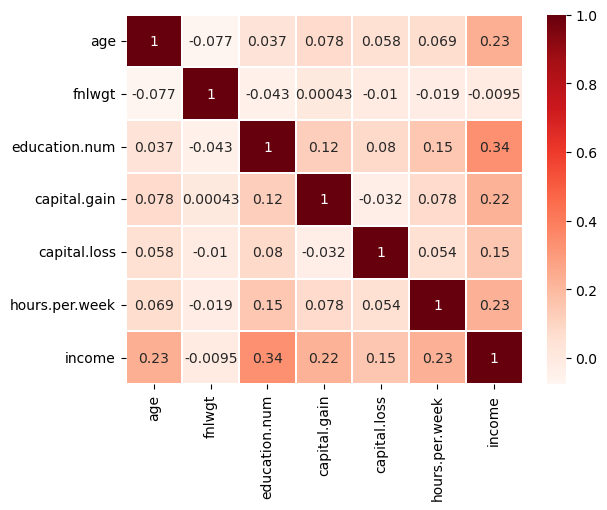

In [9]:

# Select relevant columns for correlation analysis
selected_columns = df[numeric_features]

# Calculate correlation between selected columns
corr_data = selected_columns.corr()

# Create heatmap
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)
plt.show()


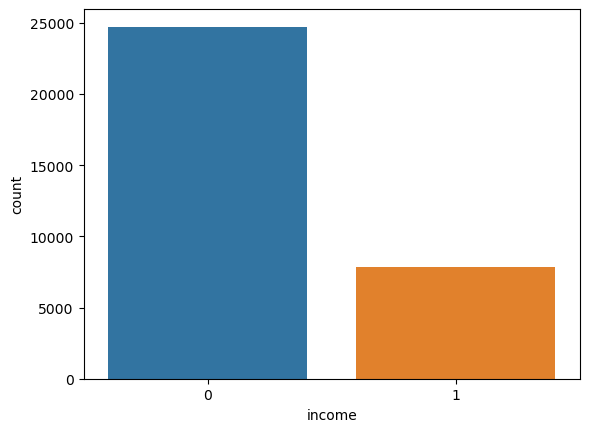

In [10]:
income_ax = sns.countplot(data=df, x='income')

# Display countplot
plt.show()

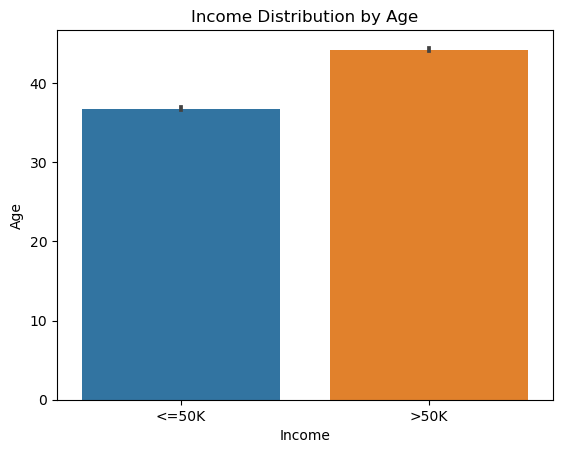

In [53]:
# sns.barplot(x = 'income', y = 'age', data = df)


df['income'] = df['income'].replace({0: '<=50K', 1: '>50K'})

# Create a box plot
sns.barplot(x='income', y='age', data=df)

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income Distribution by Age')

# Show the plot
plt.show()

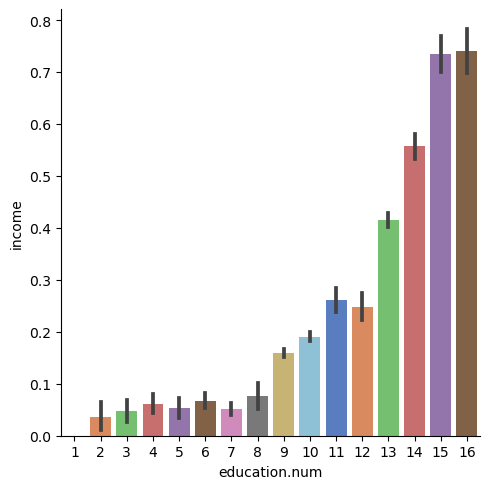

In [11]:
# Create categorical plot
catplt_edu = sns.catplot(data=df, x='education.num', y='income', kind='bar', palette='muted')

# Display the plot
plt.show()


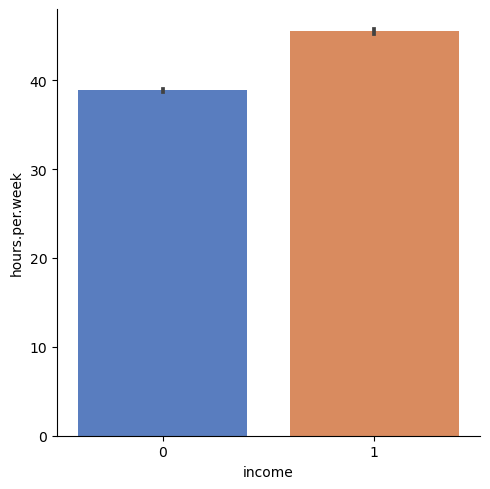

In [12]:
# Create categorical plot
catplt_hrs = sns.catplot(data=df, x='income', y='hours.per.week', kind='bar', palette='muted')

# Display the plot
plt.show()


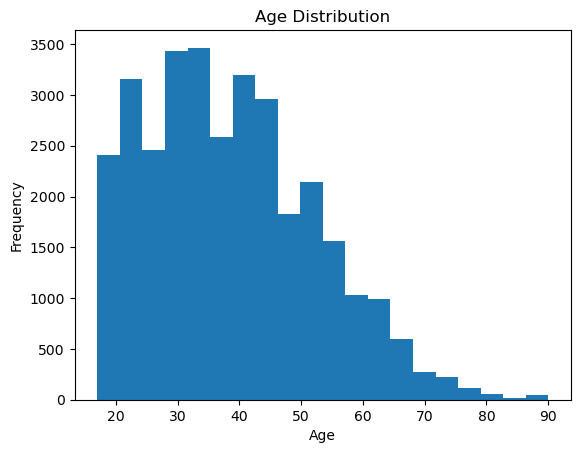

In [13]:
# Access the 'age' column
hist_age = df['age']

# Plot histogram
plt.hist(hist_age, bins=20)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the plot
plt.show()


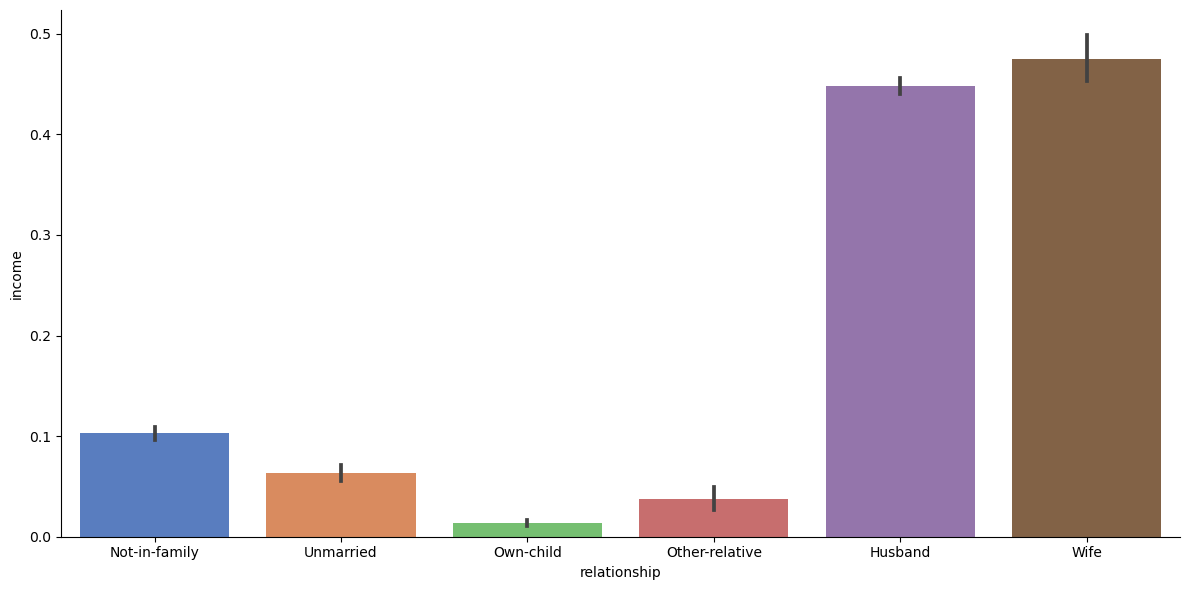

In [14]:
# Create categorical plot
catplt_relat = sns.catplot(data=df, x='relationship', y='income', kind='bar', palette='muted',height=6, aspect=2)

# Display the plot
plt.show()


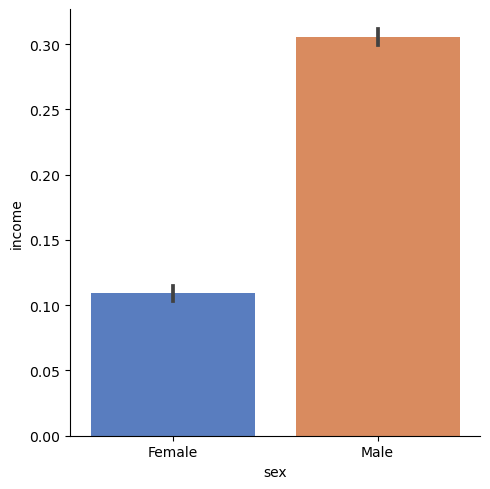

In [15]:
# Create categorical plot
catplt_sex = sns.catplot(data=df, x='sex', y='income', kind='bar', palette='muted')

# Display the plot
plt.show()


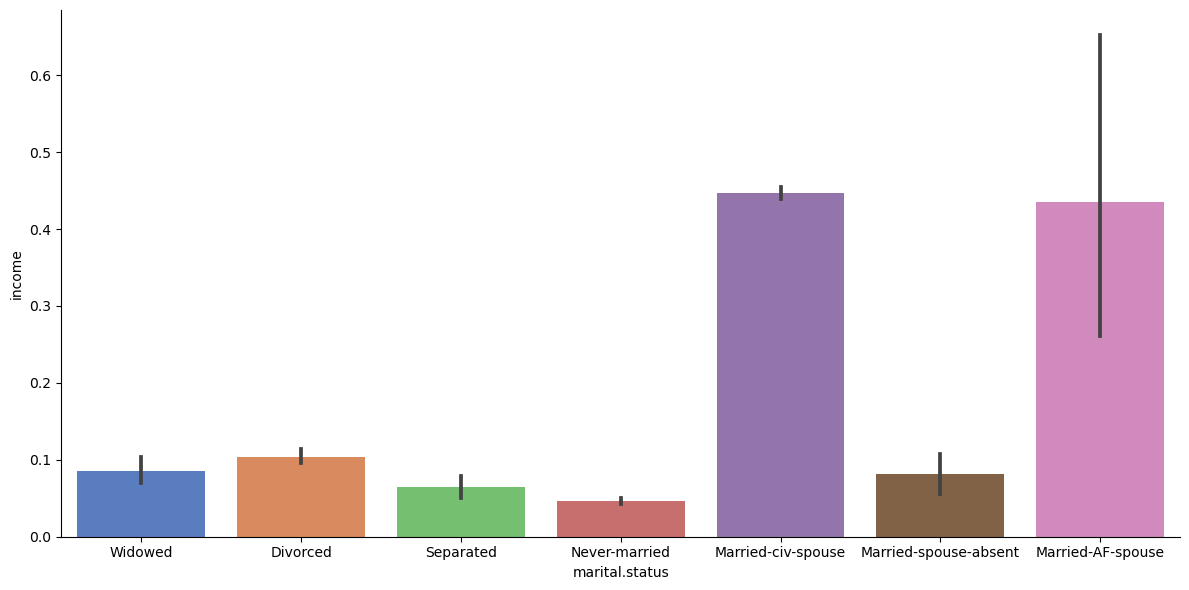

In [16]:
# Create categorical plot
catplt_married = sns.catplot(data=df, x='marital.status', y='income', kind='bar', palette='muted',height=6, aspect=2)

# Display the plot
plt.show()


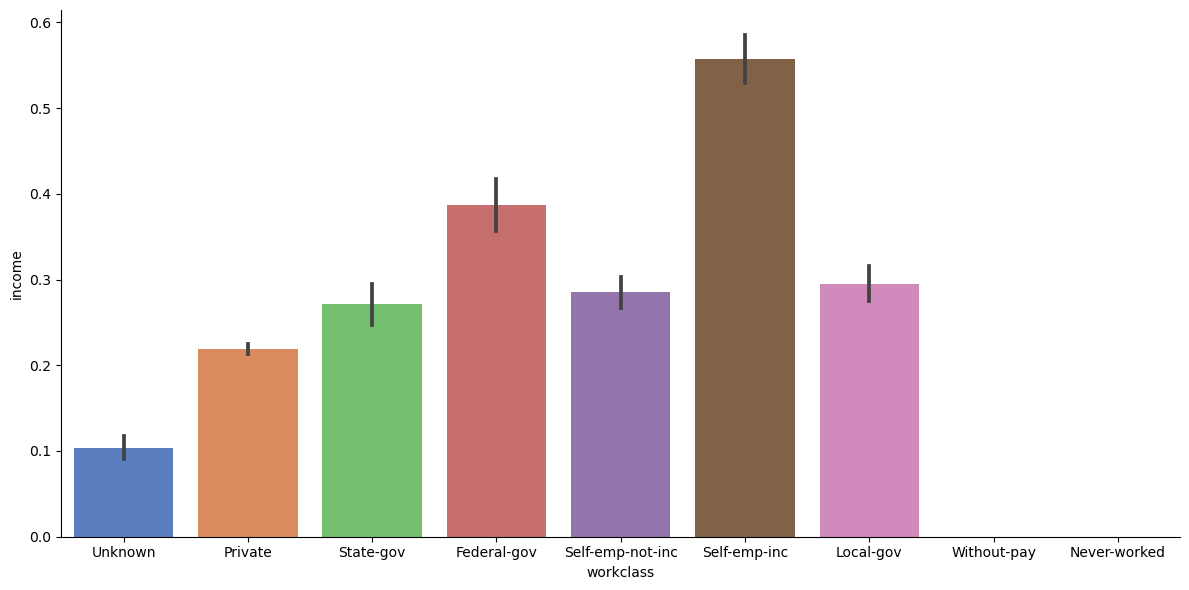

In [17]:
# Create categorical plot with adjusted size
catplt_wrkcls = sns.catplot(data=df, x='workclass', y='income', kind='bar', palette='muted', height=6, aspect=2)

# Display the plot
plt.show()



In [18]:
data = df.copy()

# Map 'sex' column
sex_map = {'Male': 0, 'Female': 1}
data['sex'] = data['sex'].map(sex_map)

In [19]:
data['marital.status'] = data['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
data['marital.status'] = data['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')

marital_map = {'Married': 1, 'Single': 0}
data['marital.status'] = data['marital.status'].map(marital_map)

In [20]:
# Remove specified columns
data = data.drop(columns=['workclass', 'education', 'occupation', 'relationship', 'race', 'native.country'])

print(data)


       age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0       90   77053              9               0    1             0   
1       82  132870              9               0    1             0   
2       66  186061             10               0    1             0   
3       54  140359              4               0    1             0   
4       41  264663             10               0    1             0   
...    ...     ...            ...             ...  ...           ...   
32556   22  310152             10               0    0             0   
32557   27  257302             12               1    1             0   
32558   40  154374              9               1    0             0   
32559   58  151910              9               0    1             0   
32560   22  201490              9               0    0             0   

       capital.loss  hours.per.week  income  
0              4356              40       0  
1              4356              18       0

In [21]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['income'])
y = data['income']

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=7)

print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)



Training set shape: (26048, 8) (26048,)
Validation set shape: (6513, 8) (6513,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create Logistic Regression model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(x_train, y_train)

cv_results = cross_val_score(lr_model, x_train, y_train, cv=10)

lr_mean_score = round(cv_results.mean(), 4)

print("Mean Cross-Validation Score:", lr_mean_score)


Mean Cross-Validation Score: 0.7966


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Create LDA model
ldr_model = LinearDiscriminantAnalysis()

# Train the model
ldr_model.fit(x_train, y_train)

cv_results = cross_val_score(ldr_model, x_train, y_train, cv=10)

ldr_mean_score = round(cv_results.mean(), 4)

print("Mean Cross-Validation Score:", ldr_mean_score)

Mean Cross-Validation Score: 0.8297


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(x_train, y_train)

cv_results = cross_val_score(knn_model, x_train, y_train, cv=10)

knn_mean_score = round(cv_results.mean(), 4)

print("Mean Cross-Validation Score:", knn_mean_score)

Mean Cross-Validation Score: 0.7743


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(x_train, y_train)

cv_results = cross_val_score(dt_model, x_train, y_train, cv=10)

dt_mean_score = round(cv_results.mean(), 4)

print("Mean Cross-Validation Score:", dt_mean_score)

Mean Cross-Validation Score: 0.8091


In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create Gaussian Naive Bayes model
gb_model = GaussianNB()

# Train the model
gb_model.fit(x_train, y_train)

cv_results = cross_val_score(gb_model, x_train, y_train, cv=10)

gb_mean_score = round(cv_results.mean(), 4)

print("Mean Cross-Validation Score:", gb_mean_score)


Mean Cross-Validation Score: 0.7943


In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['svd', 'lsqr', 'eigen']}

# Create GridSearchCV object
grid_search = GridSearchCV(ldr_model, parameters, cv=5)

# Fit GridSearchCV with training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [28]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_ldr_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best LDA Model:", best_ldr_model)


Best Parameters: {'solver': 'lsqr'}
Best Score: 0.8295070726916245
Best LDA Model: LinearDiscriminantAnalysis(solver='lsqr')


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_ldr_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

cm = confusion_matrix(y_val, y_pred)

cr = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Accuracy: 0.831874712114233
Confusion Matrix:
 [[4614  350]
 [ 745  804]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4964
           1       0.70      0.52      0.59      1549

    accuracy                           0.83      6513
   macro avg       0.78      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision score
precision = precision_score(y_val, y_pred)

# Calculate recall score
recall = recall_score(y_val, y_pred)

# Calculate F1 score
f1 = f1_score(y_val, y_pred)

# Display the scores
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)


Precision Score: 0.6967071057192374
Recall Score: 0.5190445448676565
F1 Score: 0.5948945615982242


In [31]:
# prediction = best_ldr_model.predict(data)

# # Display the predictions
# print("Predictions:", prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- income
